In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
datosPptOtuzco = pd.read_excel("Xlsx/ReportePrecipitacion_Ppt_Otuzco.xlsx", index_col=5, parse_dates=True)
datosPptQuiruvilca = pd.read_excel("Xlsx/ReportePrecipitacion_Ppt_Quiruvilca.xlsx",index_col=5, parse_dates=True)
datosPptSalpo1 = pd.read_excel("Xlsx/ReportePrecipitacion_Ppt_Salpo1.xlsx",index_col=5, parse_dates=True)
datosPptSalpo2 = pd.read_excel("Xlsx/ReportePrecipitacion_Ppt_Salpo2.xlsx",index_col=5, parse_dates=True)
datosPptSinsicap = pd.read_excel("Xlsx/ReportePrecipitacion_Ppt_Sinsicap.xlsx",index_col=5, parse_dates=True)

In [ ]:
datosPptOtuzco["Valor"]

In [4]:
datosPptOtuzco.index = pd.to_datetime(datosPptOtuzco.index)
datosPptQuiruvilca.index = pd.to_datetime(datosPptQuiruvilca.index)
datosPptSalpo1.index = pd.to_datetime(datosPptSalpo1.index)
datosPptSalpo2.index = pd.to_datetime(datosPptSalpo2.index)
datosPptSinsicap.index = pd.to_datetime(datosPptSinsicap.index)

In [5]:
datosPptOtuzco["Valor"].sort_index(inplace=True)
datosPptQuiruvilca["Valor"].sort_index(inplace=True)
datosPptSalpo1["Valor"].sort_index(inplace=True)
datosPptSalpo2["Valor"].sort_index(inplace=True)
datosPptSinsicap["Valor"].sort_index(inplace=True)

(array([ 9862, 10227, 10592, 10957, 11323, 11688, 12051], dtype=int64),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

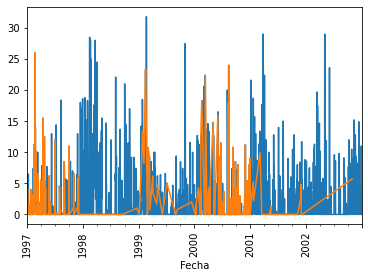

In [7]:
datosPptSalpo1["Valor"].loc['1997-01-01':'2002-12-31'].plot()
datosPptSalpo2["Valor"].loc['1997-01-01':'2002-12-31'].plot()
xticks(rotation='vertical')

In [8]:
#Generamos un solo dataframe
TodasEstaciones = pd.DataFrame()
TodasEstaciones['PptSinsicap'] = datosPptSinsicap['Valor']
TodasEstaciones['PptOtuzco'] = datosPptOtuzco['Valor']
TodasEstaciones['PptQuiruvilca'] = datosPptQuiruvilca['Valor']
TodasEstaciones['PptSalpo1'] = datosPptSalpo1['Valor']
TodasEstaciones['PptSalpo2'] = datosPptSalpo2['Valor']
TodasEstaciones['PptSalpo'] = TodasEstaciones[['PptSalpo1','PptSalpo2']].max(axis=1)

(array([-3653., -1826.,     0.,  1826.,  3652.,  5479.,  7305.,  9131.,
        10957., 12784., 14610., 16436.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

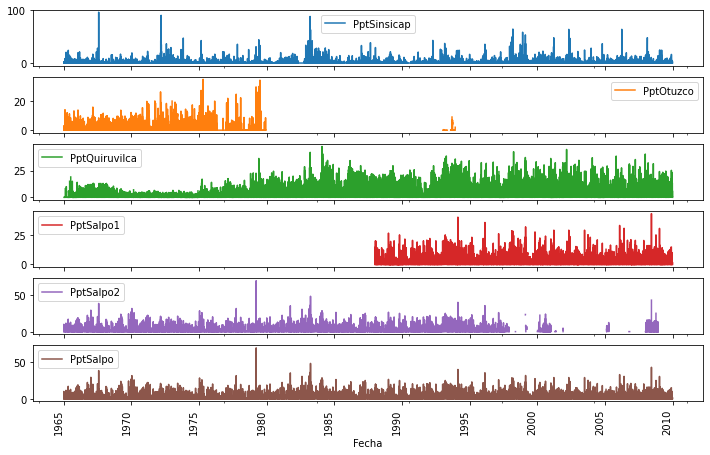

In [9]:
#Nos quedamos con datos del 1 de Enereo de 1965 al 31 de Diciembre del 2009 para tener 55 años de registros 
TodasEstaciones.loc['1965-01-01':'2009-12-31'].plot(subplots=True, figsize=(12, 8)); plt.legend(loc='best')
xticks(rotation='vertical')

In [10]:
TodasEstaciones.describe()

,PptSinsicap,PptOtuzco,PptQuiruvilca,PptSalpo1,PptSalpo2,PptSalpo
count,17005.000000,5415.000000,15986.000000,8078.000000,12956.000000,16933.000000
mean,1.093084,1.128015,3.676511,2.014731,1.766463,1.815585
std,3.761139,2.976039,5.891534,4.153773,3.932164,3.955309
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,5.600000,2.200000,1.600000,1.800000
max,96.400000,34.800000,47.500000,43.000000,69.500000,69.500000


In [11]:
#Rellenamos todos los NaN por Ceros
TodasEstaciones = TodasEstaciones.fillna(0)
TodasEstaciones.describe()

,PptSinsicap,PptOtuzco,PptQuiruvilca,PptSalpo1,PptSalpo2,PptSalpo
count,17005.000000,17005.000000,17005.000000,17005.000000,17005.000000,17005.000000
mean,1.093084,0.359200,3.456201,0.957071,1.345857,1.807898
std,3.761139,1.759586,5.778544,3.034467,3.513719,3.948686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,5.200000,0.000000,0.000000,1.800000
max,96.400000,34.800000,47.500000,43.000000,69.500000,69.500000


In [16]:
#Configurar para la red neural
fechantinicio = '1970-01-01'
fechantfinal = '1974-12-31'
capasinicio = TodasEstaciones.loc[fechantinicio:fechantfinal].values
capasalida = TodasEstaciones.loc[fechantinicio:fechantfinal].values

In [19]:
pip install scikit-neuralnetwork

  Created wheel for scikit-neuralnetwork: filename=scikit_neuralnetwork-0.7-py3-none-any.whl size=41701 sha256=759f46a842808ac621f9a8a8f9dc5224847c704c6987a459f4e201e1714596d2
  Stored in directory: c:\users\ferney andres\appdata\local\pip\cache\wheels\b9\e2\d5\2fa54c0000fa8cba8aa1cd4c361c21682da6ddab9925c30441
  Created wheel for Lasagne: filename=Lasagne-0.1-py3-none-any.whl size=79281 sha256=32fb6a23e1a60d6283a7f27d9f837afb6cad010eef914fb87841f3d6f6659d8f
  Stored in directory: c:\users\ferney andres\appdata\local\pip\cache\wheels\25\5b\33\563d410432dfba1865b036703f71b81d8565b1393846d2e611
  Created wheel for Theano: filename=Theano-1.0.5-py3-none-any.whl size=2668107 sha256=1982a2e1ba68bce39d4fe2973b74fa491d3ec4b32af63e46b97b1c50674bda6c
  Stored in directory: c:\users\ferney andres\appdata\local\pip\cache\wheels\84\cb\19\235b5b10d89b4621f685112f8762681570a9fa14dc1ce904d9
Successfully built scikit-neuralnetwork Lasagne Theano
Note: you may need to restart the kernel to use updated 

In [18]:
#Construimos la Red Neural 

from sknn.mlp import Regressor, Layer


neurones =  8
tasaaprendizaje = 0.0001
numiteraciones = 7000


#Definition of the training for the neural network
redneural = Regressor(
    layers=[
        Layer("ExpLin", units=neurones), 
        Layer("ExpLin", units=neurones), Layer("Linear")],
    learning_rate=tasaaprendizaje,
    n_iter=numiteraciones)
redneural.fit(capasinicio, capasalida)

#Get the prediction for the train set
valortest = ([])

for i in range(capasinicio.shape[0]):
    prediccion = redneural.predict(np.array([capasinicio[i,:].tolist()]))
    valortest.append(prediccion[0][0])

ModuleNotFoundError: No module named 'sknn'

In [ ]:
valortest

In [ ]:
#Añadimos los valores pronosticados a la series
TodasEstaciones['Valortest'] = 0
TodasEstaciones['Valortest'].ix[fechantinicio:fechantfinal] = valortest
TodasEstaciones.describe()

In [ ]:
#Grafico de la epoca humeda para un año
def grafico(year):
 fechaplotinicio = str(year)+'-01-01'
 fechaplotfinal = str(year)+'-04-30'
 #Ploteamos los valores hallados
 plot(TodasEstaciones['Valortest'].ix[fechaplotinicio:fechaplotfinal],'--',label='Predicted')
 #Ploteamos los valores originales
 TodasEstaciones['PptOtuzco'].ix[fechaplotinicio:fechaplotfinal].plot()
 figsize(12,8)
 ylim(0,40)
 legend(loc='best')
 savefig('Img/5yrsTraining'+'_'+str(neurones)+'_'+str(tasaaprendizaje)+'_'+str(numiteraciones)+'from'+fechaplotinicio+\
        'to'+fechaplotfinal+'.png')
 clf()

In [ ]:
grafico(1970)
grafico(1971)
grafico(1972)
grafico(1973)
grafico(1974)

In [ ]:
#Completamos para la estacion de Otuzco de 1980 al 2010
fecha_pred_inicio = '1980-01-01'
fecha_pred_final = '2009-12-31'
capasinicio = TodasEstaciones.ix[fecha_pred_inicio:fecha_pred_final].fillna(0).as_matrix()[:,[0,2,5]]

valortest = ([])

for i in range(capasinicio.shape[0]):
    prediccion = redneural.predict(np.array([capasinicio[i,:].tolist()]))
    if prediccion[0][0] > 0:
        valortest.append(prediccion[0][0])
    else:
         valortest.append(0)
    
TodasEstaciones['PptOtuzco'].ix[fecha_pred_inicio:fecha_pred_final] = valortest

In [ ]:
DatosDefinitivos = TodasEstaciones[['PptSinsicap','PptOtuzco','PptQuiruvilca','PptSalpo']].ix['1965-01-01':'2009-12-31']
DatosDefinitivos.plot(subplots=True, figsize=(12, 8)); plt.legend(loc='best')
xticks(rotation='vertical')